# Advertising

In this dataset we have data about advertising spent on media like *TV*, *Radio*, and *Newspaper* and how this affects product sales. What I will do here is train an algorithm to find out which advertising media have the best effect on the sales obtained.

In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

In [30]:
data = pd.read_csv("/content/sample_data/Advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### What variables are correlated?

To train our algorithm we need first know the correlation between variables, the closer the correlation is to one, the higher the correlation is.

****

We have the next results, the order of correlation from highest to lowest is as follows:

- Sales+TV: 0.782224424861606

- Sales+Radio: 0.576222574571055

- Sales+Newspaper: 0.22829902637616534

All this can be seen in the graphs of sales in relation to advertising in different media.

In [31]:
def corr_coeff(df, var1, var2):
    df["corrn"] = (df[var1] - np.mean(df[var1])) * (df[var2] - np.mean(df[var2]))
    df["corr1"] = (df[var1] - np.mean(df[var1]))**2
    df["corr2"] = (df[var2] - np.mean(df[var2]))**2
    corr_p = sum(df["corrn"])/np.sqrt(sum(df["corr1"]) * sum(df["corr2"]))
    return corr_p

In [32]:
cols = data.columns.values

In [33]:
for x in cols:
  for y in cols:
    if(x == "Sales"):
      print(x + "+" + y + ":" + str(corr_coeff(data, x, y)))

Sales+TV:0.782224424861606
Sales+Radio:0.576222574571055
Sales+Newspaper:0.22829902637616534
Sales+Sales:1.0


In [34]:
data.corr()

,TV,Radio,Newspaper,Sales,corrn,corr1,corr2
TV,1.000000,0.054809,0.056648,0.782224,0.075915,0.075915,0.075915
Radio,0.054809,1.000000,0.354104,0.576223,0.402556,0.402556,0.402556
Newspaper,0.056648,0.354104,1.000000,0.228299,0.142256,0.142256,0.142256
Sales,0.782224,0.576223,0.228299,1.000000,0.322686,0.322686,0.322686
corrn,0.075915,0.402556,0.142256,0.322686,1.000000,1.000000,1.000000
corr1,0.075915,0.402556,0.142256,0.322686,1.000000,1.000000,1.000000
corr2,0.075915,0.402556,0.142256,0.322686,1.000000,1.000000,1.000000


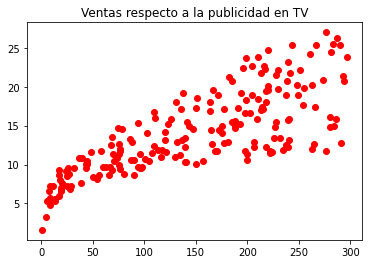

In [35]:
plt.plot(data["TV"], data["Sales"], "ro")
plt.title("Sales with respect with TV advertising")
plt.show()

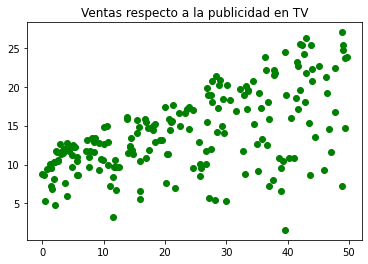

In [36]:
plt.plot(data["Radio"], data["Sales"], "go")
plt.title("Sales with respect with Radio advertising")
plt.show()

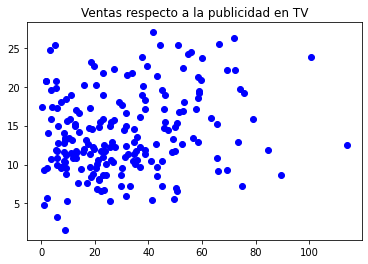

In [37]:
plt.plot(data["Newspaper"], data["Sales"], "bo")
plt.title("Sales with respect with Newspaper advertising")
plt.show()

## Simple Linear Regresion

Now we know what variables have a mayor correlation, now we are going to do different regressions where we can see how well the different models fit together.

In [38]:
import statsmodels.formula.api as smf

In [39]:
a = np.random.randn(len(data))
check = (a<0.8)
training = data[check]
testing = data[~check]

In [40]:
lmTV = smf.ols(formula="Sales~TV", data=training).fit()
lmRadio = smf.ols(formula="Sales~Radio", data=training).fit()
lmNewspaper = smf.ols(formula="Sales~Newspaper", data=training).fit()

## Summary

In the next three cells we have a general summary of the models created, in this case we center our attention in the followind data to see how well our model fits.

### R-squared

In general terms the R-squared tell us how well our model fits to the data we have, between highest is the R-squared better the fit of our model could be.

The R-squared values fit between 0 and 100:

-  If the value is closer to 0 then our model does not explain any proportion of variability of the data. 

-  If the value is closer to 100 then our model can explain better the variability of the data.

Knowing the above, we can see that the **TV** model has the best R-squared value and the **Newspaper** model has the worst R-squared value.

With this, we can think that the **TV** variable should be in our model.

In [41]:
lmTV.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     220.1
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           1.11e-31
Time:                        22:22:14   Log-Likelihood:                -416.44
No. Observations:                 159   AIC:                             836.9
Df Residuals:                     157   BIC:                             843.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.1691      0.540     13.270      0.000       6.102       8.236
TV             0.0460      0.003     14.836      0.000       0.040       0.052
==============================================================================
Omnibus:                        0.813   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.666   Jarque-Bera (JB):                0.864
Skew:                          -0.029   Prob(JB):                        0.649
Kurtosis:                       2.644   Cond. No.                         356.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
lmRadio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     85.02
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           1.87e-16
Time:                        22:22:15   Log-Likelihood:                -451.70
No. Observations:                 159   AIC:                             907.4
Df Residuals:                     157   BIC:                             913.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.4324      0.610     15.473      0.000       8.228      10.636
Radio          0.2063      0.022      9.221      0.000       0.162       0.251
==============================================================================
Omnibus:                       19.631   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.912
Skew:                          -0.845   Prob(JB):                     1.06e-05
Kurtosis:                       3.775   Cond. No.                         50.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
lmNewspaper.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     12.37
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           0.000571
Time:                        22:22:16   Log-Likelihood:                -480.08
No. Observations:                 159   AIC:                             964.2
Df Residuals:                     157   BIC:                             970.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.1100      0.703     17.230      0.000      10.722      13.498
Newspaper      0.0653      0.019      3.517      0.001       0.029       0.102
==============================================================================
Omnibus:                        6.151   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.283
Skew:                           0.260   Prob(JB):                        0.117
Kurtosis:                       2.386   Cond. No.                         67.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Error

The error of our model is as follows:

- TV
 - Training: 21.2%
 - Testing: 19.1%
- Radio
 - Training: 27.5%
 - Testing: 33%
- Newspaper
 - Training: 33.5%
 - Testing:39.3

In this case the best fitting model is the one where **TV** is taken and the worst fitting to our data is the one where **Newspaper** is taken. We will see if adding more variables to our model will give us a better result.

### TV

In [73]:
training

,TV,Radio,Newspaper,Sales,corrn,corr1,corr2
0,230.1,37.8,69.2,22.1,65.246006,65.246006,65.246006
1,44.5,39.3,45.1,10.4,13.122506,13.122506,13.122506
2,17.2,45.9,69.3,9.3,22.302006,22.302006,22.302006
4,180.8,10.8,58.4,12.9,1.260006,1.260006,1.260006
6,57.5,32.8,23.5,11.8,4.939506,4.939506,4.939506
...,...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,41.248506,41.248506,41.248506
196,94.2,4.9,8.1,9.7,18.684006,18.684006,18.684006
197,177.0,9.3,6.4,12.8,1.494506,1.494506,1.494506
198,283.6,42.0,66.2,25.5,131.733006,131.733006,131.733006


In [74]:
# Use the model to predict the data of our training set
sales_pred_TV = lmTV.predict(pd.DataFrame(training["TV"]))
sales_pred_TV

0      17.744382
1       9.214272
2       7.959573
4      15.478571
6       9.811747
         ...    
195     8.924726
196    11.498466
197    15.303924
198    20.203222
199    17.836301
Length: 159, dtype: float64

In [75]:
sales_real_TV = training.iloc[:,3]
sales_real_TV

0      22.1
1      10.4
2       9.3
4      12.9
6      11.8
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 159, dtype: float64

In [76]:
sales_comp = pd.DataFrame({
    "TV": training.iloc[:,0],
    "realSales": sales_real_TV,
    "predSales": sales_pred_TV
})

sales_comp

,TV,realSales,predSales
0,230.1,22.1,17.744382
1,44.5,10.4,9.214272
2,17.2,9.3,7.959573
4,180.8,12.9,15.478571
6,57.5,11.8,9.811747
...,...,...,...
195,38.2,7.6,8.924726
196,94.2,9.7,11.498466
197,177.0,12.8,15.303924
198,283.6,25.5,20.203222


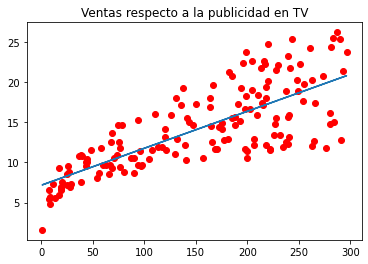

In [77]:
# Graph the model among the data of the training set
plt.plot(sales_comp["TV"], sales_comp["realSales"], "ro")
plt.plot(sales_comp["TV"], sales_comp["predSales"])
plt.title("Ventas respecto a la publicidad en TV")
plt.show()

In [79]:
# Calculamos los valores con nuestro conjunto de testing
sales_pred_TV = lmTV.predict(pd.DataFrame(testing["TV"]))
sales_real_TV = testing.iloc[:,3]

sales_comp = pd.DataFrame({
    "TV": testing.iloc[:,0],
    "realSales": sales_real_TV,
    "predSales": sales_pred_TV
})

sales_comp.head()

,TV,realSales,predSales
3,151.5,18.5,14.131953
5,8.7,7.2,7.568916
12,23.8,9.2,8.262907
18,69.2,11.3,10.349475
34,95.7,9.5,11.567405


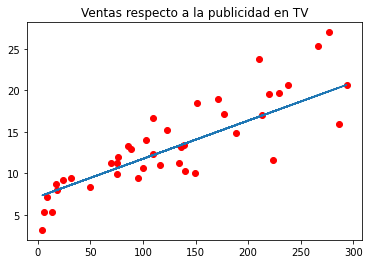

In [80]:
# Graficamos nuestro modelo junto a los datos de nuestro conjunto de testing
plt.plot(sales_comp["TV"], sales_comp["realSales"], "ro")
plt.plot(sales_comp["TV"], sales_comp["predSales"])
plt.title("Sales with respect with TV advertising")
plt.show()

### ¿Qué tan buena es la predicción?

- SST = SSD + SSR

- SST : Variability of the data with respect to its mean.

- SSD : Difference between the original data and the predictions that the model is not able to explain (errors that should follow a normal distribution).

- SSR : Difference between the regression and the mean value that the model seeks to explain.

- R2 = SSR / SST, coefficient of determination between 0 and 1

In [78]:
# We will validate our model, this validation will be done with respect to our training data.
SSE = sum((sales_comp["realSales"]-sales_comp["predSales"])**2)
RSE = np.sqrt(SSE/len(sales_comp)-2)
sales_m = np.mean(sales_comp["realSales"])

error = RSE / sales_m
error

0.21228729074086322

In [81]:
# We will validate our model, this validation will be done with respect to our testing data.
SSE = sum((sales_comp["realSales"]-sales_comp["predSales"])**2)
RSE = np.sqrt(SSE/len(sales_comp)-2)
sales_m = np.mean(sales_comp["realSales"])

error = RSE / sales_m
error

0.190797617809965

### Radio

In [86]:
sales_pred_Radio = lmRadio.predict(pd.DataFrame(training["Radio"]))
sales_real_Radio = training.iloc[:,3]

sales_comp_radio = pd.DataFrame({
    "Radio": training.iloc[:,1],
    "realSales": sales_real_Radio,
    "predSales": sales_pred_Radio
})

sales_comp_radio

,Radio,realSales,predSales
0,37.8,22.1,17.230819
1,39.3,10.4,17.540280
2,45.9,9.3,18.901912
4,10.8,12.9,11.660509
6,32.8,11.8,16.199280
...,...,...,...
195,3.7,7.6,10.195723
196,4.9,9.7,10.443293
197,9.3,12.8,11.351047
198,42.0,25.5,18.097311


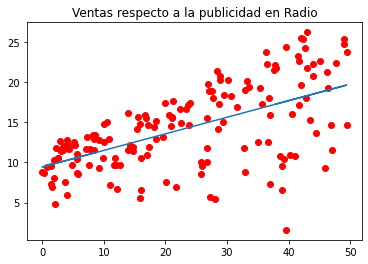

In [88]:
# We plot our model together with the data from our training set.
plt.plot(sales_comp_radio["Radio"], sales_comp_radio["realSales"], "ro")
plt.plot(sales_comp_radio["Radio"], sales_comp_radio["predSales"])
plt.title("Ventas respecto a la publicidad en Radio")
plt.show()

In [90]:
# We calculate the values with our testing set
sales_pred_radio = lmRadio.predict(pd.DataFrame(testing["Radio"]))
sales_real_radio = testing.iloc[:,3]

sales_comp_radio_tra = pd.DataFrame({
    "Radio": testing.iloc[:,1],
    "realSales": sales_real_radio,
    "predSales": sales_pred_radio
})


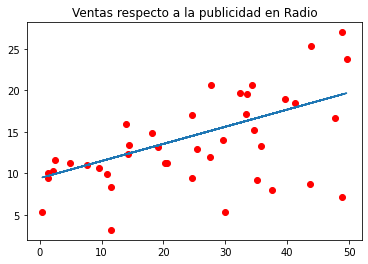

In [91]:
plt.plot(sales_comp_radio_tra["Radio"], sales_comp_radio_tra["realSales"], "ro")
plt.plot(sales_comp_radio_tra["Radio"], sales_comp_radio_tra["predSales"])
plt.title("Ventas respecto a la publicidad en Radio")
plt.show()

In [92]:
# We will validate our model, this validation will be done with respect to our training data.
SSD = sum((sales_comp_radio["realSales"]-sales_comp_radio["predSales"])**2)
RSE = np.sqrt(SSD/len(sales_comp_radio)-2)
sales_m = np.mean(sales_comp_radio["realSales"])

error = RSE / sales_m
error

0.2753054122916969

In [93]:
# We will validate our model, this validation will be done with respect to our testing data.
SSD = sum((sales_comp_radio_tra["realSales"]-sales_comp_radio_tra["predSales"])**2)
RSE = np.sqrt(SSD/len(sales_comp_radio_tra)-2)
sales_m = np.mean(sales_comp_radio_tra["realSales"])

error = RSE / sales_m
error

0.32965889976273044

### Newspaper

In [96]:
sales_pred_newspaper = lmNewspaper.predict(pd.DataFrame(training["Newspaper"]))
sales_real_newspaper = training.iloc[:,3]

sales_comp_newspaper = pd.DataFrame({
    "Newspaper": training.iloc[:,2],
    "realSales": sales_real_newspaper,
    "predSales": sales_pred_newspaper
})

sales_comp_newspaper

,Newspaper,realSales,predSales
0,69.2,22.1,16.630849
1,45.1,10.4,15.056405
2,69.3,9.3,16.637382
4,58.4,12.9,15.925289
6,23.5,11.8,13.645285
...,...,...,...
195,13.8,7.6,13.011587
196,8.1,9.7,12.639208
197,6.4,12.8,12.528148
198,66.2,25.5,16.434861


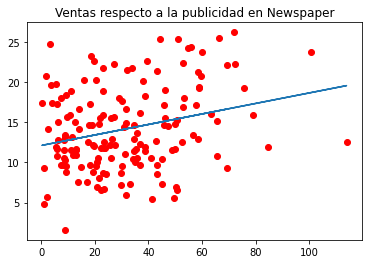

In [97]:
# We plot our model together with the data from our training set.
plt.plot(sales_comp_newspaper["Newspaper"], sales_comp_newspaper["realSales"], "ro")
plt.plot(sales_comp_newspaper["Newspaper"], sales_comp_newspaper["predSales"])
plt.title("Ventas respecto a la publicidad en Newspaper")
plt.show()

In [101]:
sales_pred_newspaper = lmNewspaper.predict(pd.DataFrame(testing["Newspaper"]))
sales_real_newspaper = testing.iloc[:,3]

sales_comp_newspaper_tes = pd.DataFrame({
    "Newspaper": testing.iloc[:,2],
    "realSales": sales_real_newspaper,
    "predSales": sales_pred_newspaper
})

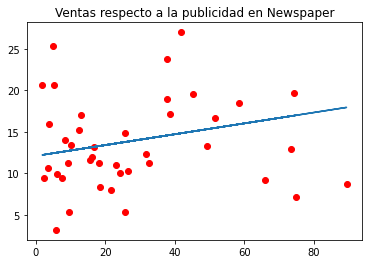

In [102]:
plt.plot(sales_comp_newspaper_tes["Newspaper"], sales_comp_newspaper_tes["realSales"], "ro")
plt.plot(sales_comp_newspaper_tes["Newspaper"], sales_comp_newspaper_tes["predSales"])
plt.title("Ventas respecto a la publicidad en Newspaper")
plt.show()

In [103]:
SSD = sum((sales_comp_newspaper["realSales"]-sales_comp_newspaper["predSales"])**2)
RSE = np.sqrt(SSD/len(sales_comp_newspaper)-2)
sales_m = np.mean(sales_comp_newspaper["realSales"])

error = RSE / sales_m
error

0.33554001437150455

In [104]:
# We will validate our model, this validation will be done with respect to our testing data.
SSD = sum((sales_comp_newspaper_tes["realSales"]-sales_comp_newspaper_tes["predSales"])**2)
RSE = np.sqrt(SSD/len(sales_comp_newspaper_tes)-2)
sales_m = np.mean(sales_comp_newspaper_tes["realSales"])

error = RSE / sales_m
error

0.3937283767645156

## Multiple Regression Model


In [105]:
# Creation of our multiple models
lmTVRadio = smf.ols(formula="Sales~TV+Radio", data=training).fit()
lmTVNewspaper = smf.ols(formula="Sales~TV+Newspaper", data=training).fit()

### Summary

In this case looking at the summary of the two models we can see a considerable improvement in the R-squared of each of them, while in the previous models we had the following results: 
- TV: 0.581
- Radio: 0.347
- Newspaper: 0.067

In the current models we obtain the following: 
- TV + Radio: 0.895
- TV + Newspaper: 0.615

From this we can see that it may be a better model to take **TV** + **Radio** instead of **TV** + **Radio**.

In [106]:
lmTVRadio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     676.5
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           1.34e-77
Time:                        23:23:45   Log-Likelihood:                -305.70
No. Observations:                 159   AIC:                             617.4
Df Residuals:                     156   BIC:                             626.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9355      0.333      8.815      0.000       2.278       3.593
TV             0.0445      0.002     28.685      0.000       0.041       0.048
Radio          0.1949      0.009     21.730      0.000       0.177       0.213
==============================================================================
Omnibus:                       59.415   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.062
Skew:                          -1.434   Prob(JB):                     9.80e-44
Kurtosis:                       7.655   Cond. No.                         441.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
lmTVNewspaper.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     127.2
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           1.73e-33
Time:                        23:24:09   Log-Likelihood:                -409.22
No. Observations:                 159   AIC:                             824.4
Df Residuals:                     156   BIC:                             833.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9086      0.613      9.645      0.000       4.699       7.119
TV             0.0447      0.003     14.979      0.000       0.039       0.051
Newspaper      0.0462      0.012      3.852      0.000       0.023       0.070
==============================================================================
Omnibus:                        0.060   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.970   Jarque-Bera (JB):                0.026
Skew:                          -0.028   Prob(JB):                        0.987
Kurtosis:                       2.974   Cond. No.                         426.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model error

The error of our models is as follows:

- TV + Radio:
  - Training: 11.8%
  - Testing: 13.46%.
- TV + Newspaper:
 - Training: 22.63% Testing: 13.46% Testing: 13.46% Training: 22.63% Training: 22.63
 - Testing: 13.46%.

We can see that the error percentage of both models is the same in the *testing* set as opposed to the one obtained in the *training* set from which we can obtain the following conclusion.



### TV - Radio

In [137]:
sales_pred_tv_radio = lmTVRadio.predict(training)
sales_real_tv_radio = training.iloc[:,3]

sales_comp_tv_radio_tra = pd.DataFrame({
    "TV": training.iloc[:,0],
    "Radio": training.iloc[:,1],
    "realSales": sales_real_tv_radio,
    "predSales": sales_pred_tv_radio
})


sales_comp_tv_radio_tra.head()

,TV,Radio,realSales,predSales
0,230.1,37.8,22.1,20.535198
1,44.5,39.3,10.4,12.574355
2,17.2,45.9,9.3,12.646808
4,180.8,10.8,12.9,13.080303
6,57.5,32.8,11.8,11.885505


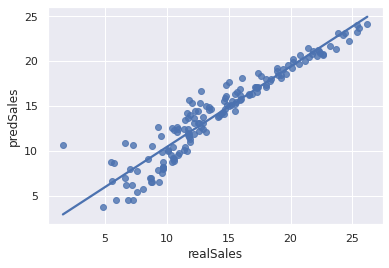

In [138]:
# Our regression model with respect to actual sales
sns.regplot(x=sales_comp_tv_radio_tra["realSales"],y=sales_comp_tv_radio_tra["predSales"],ci=None);

In [139]:
sales_pred_tv_radio = lmTVRadio.predict(testing)
sales_real_tv_radio = testing.iloc[:,3]

sales_comp_tv_radio_tes = pd.DataFrame({
    "TV": testing.iloc[:,0],
    "Radio": testing.iloc[:,1],
    "realSales": sales_real_tv_radio,
    "predSales": sales_pred_tv_radio
})


sales_comp_tv_radio_tes.head()

,TV,Radio,realSales,predSales
3,151.5,41.3,18.5,17.722227
5,8.7,48.9,7.2,12.853570
12,23.8,35.1,9.2,10.835241
18,69.2,20.5,11.3,10.008355
34,95.7,1.4,9.5,7.463922


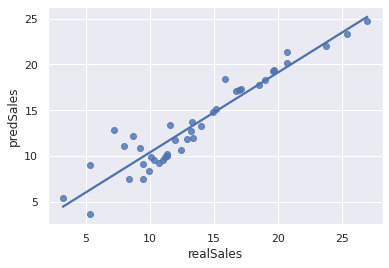

In [140]:
# Our regression model with respect to actual sales
sns.regplot(x=sales_comp_tv_radio_tes["realSales"],y=sales_comp_tv_radio_tes["predSales"],ci=None);

In [141]:
# We will validate our model, this validation will be done with respect to our training data.
SSD = sum((sales_comp_tv_radio_tra["realSales"]-sales_comp_tv_radio_tra["predSales"])**2)
RSE = np.sqrt(SSD/(len(sales_comp_tv_radio_tra)-2-1))
sales_mean = np.mean(sales_comp_tv_radio_tra["realSales"])
error = RSE / sales_mean

error

0.11803894071016673

In [142]:
# We will validate our model, this validation will be done with respect to our testing data.
SSD = sum((sales_comp_tv_radio_tes["realSales"]-sales_comp_tv_radio_tes["predSales"])**2)
RSE = np.sqrt(SSD/(len(sales_comp_tv_radio_tes)-2-1))
sales_mean = np.mean(sales_comp_tv_radio_tes["realSales"])
error = RSE / sales_mean

error

0.1346428034314532

### TV - Newspaper

In [145]:
sales_pred_tv_newspaper = lmTVNewspaper.predict(training)
sales_real_tv_newspaper = training.iloc[:,3]

sales_comp_tv_newspaper_tra = pd.DataFrame({
    "TV": training.iloc[:,0],
    "Newspaper": training.iloc[:,1],
    "realSales": sales_real_tv_newspaper,
    "predSales": sales_pred_tv_newspaper
})


sales_comp_tv_newspaper_tra.head()

,TV,Newspaper,realSales,predSales
0,230.1,37.8,22.1,19.402224
1,44.5,39.3,10.4,9.984635
2,17.2,45.9,9.3,9.882198
4,180.8,10.8,12.9,16.697312
6,57.5,32.8,11.8,9.567536


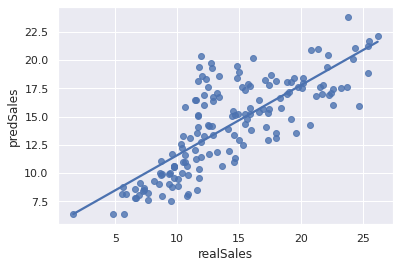

In [146]:
# Our regression model with respect to actual sales
sns.regplot(x=sales_comp_tv_newspaper_tra["realSales"],y=sales_comp_tv_newspaper_tra["predSales"],ci=None);

In [147]:
sales_pred_tv_newspaper = lmTVNewspaper.predict(testing)
sales_real_tv_newspaper = testing.iloc[:,3]

sales_comp_tv_newspaper_tes = pd.DataFrame({
    "TV": testing.iloc[:,0],
    "Newspaper": testing.iloc[:,1],
    "realSales": sales_real_tv_radio,
    "predSales": sales_pred_tv_radio
})


sales_comp_tv_newspaper_tes.head()

,TV,Newspaper,realSales,predSales
3,151.5,41.3,18.5,17.722227
5,8.7,48.9,7.2,12.853570
12,23.8,35.1,9.2,10.835241
18,69.2,20.5,11.3,10.008355
34,95.7,1.4,9.5,7.463922


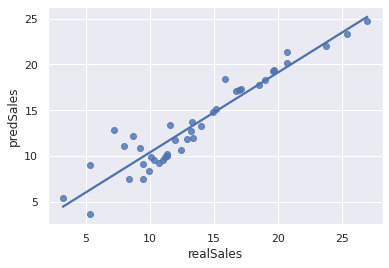

In [148]:
# Nuestro modelo de regresión respecto a las ventas reales
sns.regplot(x=sales_comp_tv_newspaper_tes["realSales"],y=sales_comp_tv_newspaper_tes["predSales"],ci=None);

In [149]:
# Validaremos nuestro modelo, esta validación la haremos respecto a nuestros datos de testing
SSD = sum((sales_comp_tv_newspaper_tra["realSales"]-sales_comp_tv_newspaper_tra["predSales"])**2)
RSE = np.sqrt(SSD/(len(sales_comp_tv_newspaper_tra)-2-1))
sales_mean = np.mean(sales_comp_tv_newspaper_tra["realSales"])
error = RSE / sales_mean

error

0.22635014106406096

In [150]:
# Validaremos nuestro modelo, esta validación la haremos respecto a nuestros datos de testing
SSD = sum((sales_comp_tv_newspaper_tes["realSales"]-sales_comp_tv_newspaper_tes["predSales"])**2)
RSE = np.sqrt(SSD/(len(sales_comp_tv_newspaper_tes)-2-1))
sales_mean = np.mean(sales_comp_tv_newspaper_tes["realSales"])
error = RSE / sales_mean

error

0.1346428034314532

# Conclusion

Although both models behave the same with the *testing* set as opposed to the *training* set the difference is due to the amount of data used in each set. While in *testing* we have only 20% of the data in *training* we have 80% of the data so we can see that both models behave the same when we have little data, but when we add much more data the **TV+Radio** model behaves better and is more accurate when calculating with more data so we can conclude that the best strategy is where we find the *TV* and *Radio* leaving aside the print advertising since this is not representative when compared to sales.